# Project 3 - Monte Carlo Techniques

Univeristy ID: 11018744\
University of Manchester\
March 2024

This program models thermal neutrons fired at a slab of material (water, lead or graphite) using the Monte Carlo method to calculate the proportions of neutrons that are reflected, absorbed and transmitted. It then calculates the characteristic attenuation lengths in each of the three materials based on these calculations. 

It also explores the Woodcock method and its ability to evaluate the rates of transmission, reflection and absorption for bilayer slabs of two different materials. 

## Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import ipywidgets as widgets
from IPython.display import display


## Generating random numbers

First, we can generate a table of numbers using the python in-built random number generator (RNG), np.random.uniform(), and show that the numbers are uniform over a chosen range. 

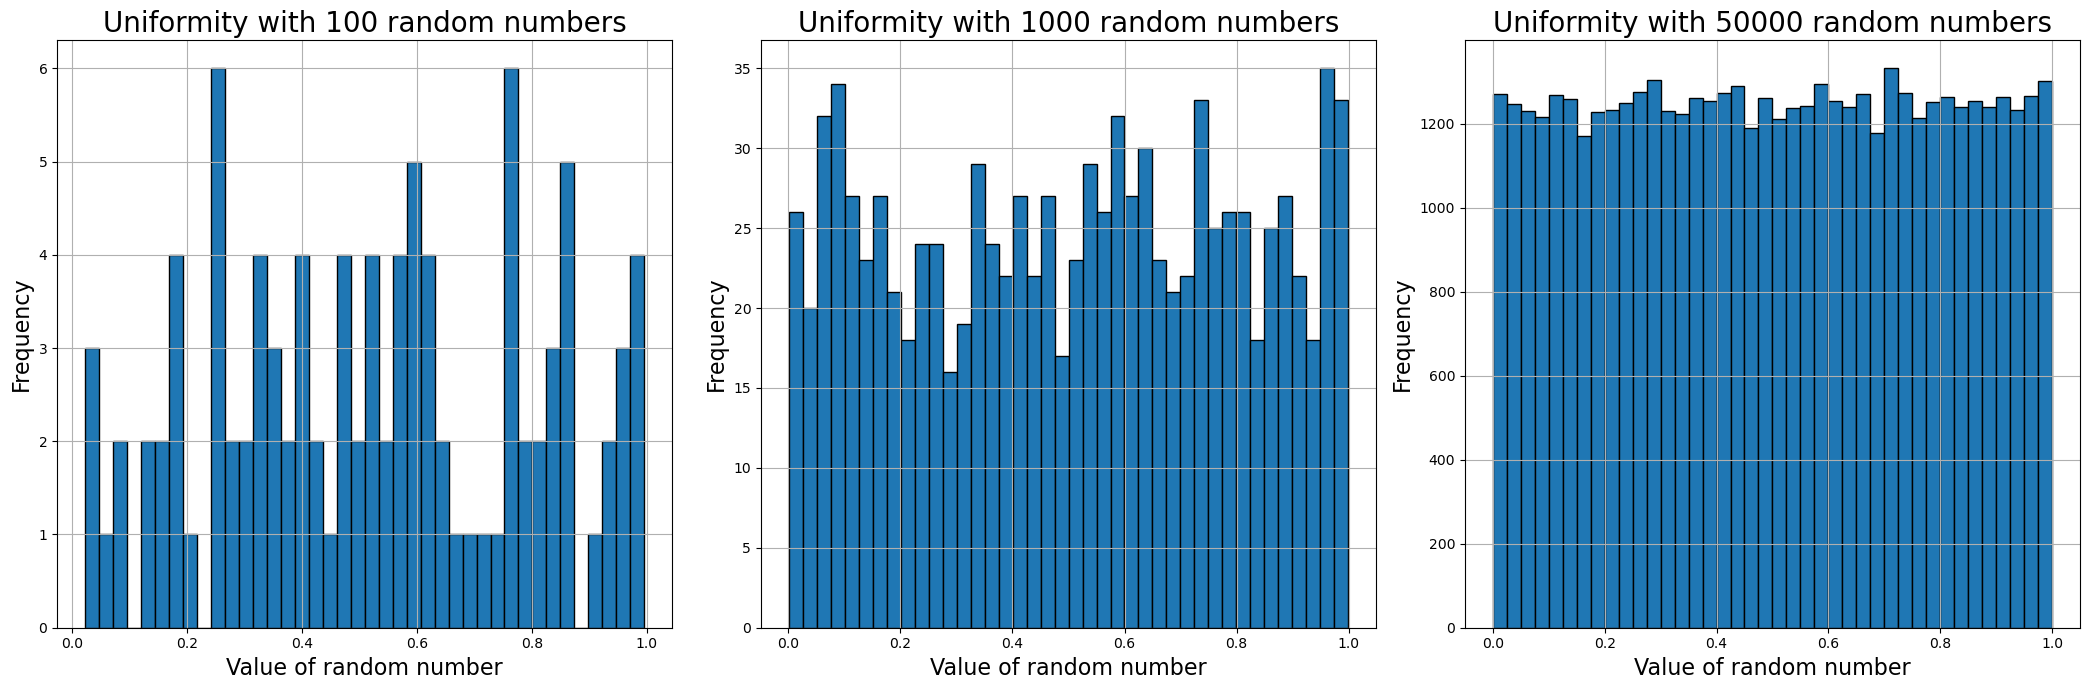

In [2]:
%matplotlib inline
%matplotlib inline
def generate_uniform_random_numbers():
    """
    Generates random numbers using the numpy in-built random number generator. 
    
    Parameters:
    N : number of random numbers generated
    """
    N_random_numbers = [100, 1000, 50000]   # Number of random numbers generated
    
    # Setup such that all three graphs for N appear on one row
    num_rows = 1
    num_cols = len(N_random_numbers)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 7))
    
    # Iterate through the different values for N
    for i, N in enumerate(N_random_numbers):
        random_numbers = np.random.uniform(0, 1, size=N)

        # Plot histogram of random numbers
        ax = axs[i]
        ax.hist(random_numbers, bins=40, edgecolor='black')

        # Set labels and title
        ax.set_title('Uniformity with {0} random numbers'.format(N), fontsize='20')
        ax.set_xlabel('Value of random number', fontsize='16')
        ax.set_ylabel('Frequency', fontsize='16')
        ax.grid(True)
        
    plt.tight_layout()
    plt.show()

# Run the uniform random numbers function for different sizes of numbers generated
generate_uniform_random_numbers()

In each of the graphs there is no distinguishable distribution for the random generation of values between 0.0 and 1.0; it is uniform. This is best seen with a larger sample size such as 5000 generated random numbers, in the last graph. Here, the frequencies of each value are seen to be very similar across the chosen range, and hence suitably uniform.

### Using RNGs to create a random 3D plot

RNGs can be used to generate random 3D coordinates, which can be plotted to produce a uniformly random 3-dimensional distribution. 

However, using the randssp(), which is a Linear Congruential Generator, creates spectral planes, whereas np.random.uniform() does not.

In [3]:
N_RANDOM_NUMBERS = 1000

In [4]:
def numpy_random_coords(N):
    """
    Generates random 3-dimensional coordinate points and plots them to find a uniform random distribution of points
    in a 3D space. The plot is interactive so that spectral planes can be checked for to verify that the 
    distribution is indeed uniform.
    
    Parameters: 
    N : number of random numbers generated per dimension
    
    Returns:
    x : N random numbers
    y : N random numbers
    z : N random numbers
    """
    # Generate random x, y and z coordinates
    x = np.random.uniform(0, 1, size=N)
    y = np.random.uniform(0, 1, size=N)
    z = np.random.uniform(0, 1, size=N)
    
    return x, y, z

In [5]:
def randssp(p,q):
    """
    This function uses the linear congruential generator (LCG) algorithm which creates a matrix of dimensions 
    p by q filled with random numbers.
    
    Parameters:
    p : number of rows in the matrix of random numbers
    q : number of columns in the matrix of random numbers
    
    Returns:
    r : matrix of random numbers with dimensions (p, q)
    """
    global m, a, c, x
    
    # Check if x is defined. If not, a NameError will occur and the program will initialise the parameters 
    # of the LCG algorithm
    try: x
    except NameError:
        m = pow(2, 31)       # The modulus, a large prime number
        a = pow(2, 16) + 3   # The multiplier, a large number
        c = 0                # The increment, starts at zero
        x = 123456789        # The seed, default start value
    
    # Define p and q if not already defined
    try: p
    except NameError:
        p = 1
    try: q
    except NameError:
        q = p
    
    # Create matrix of zeros with dimensions (p, q)
    r = np.zeros([p,q])

    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)    # LCG algorithm
            r[k, l] = x/m
    
    return r


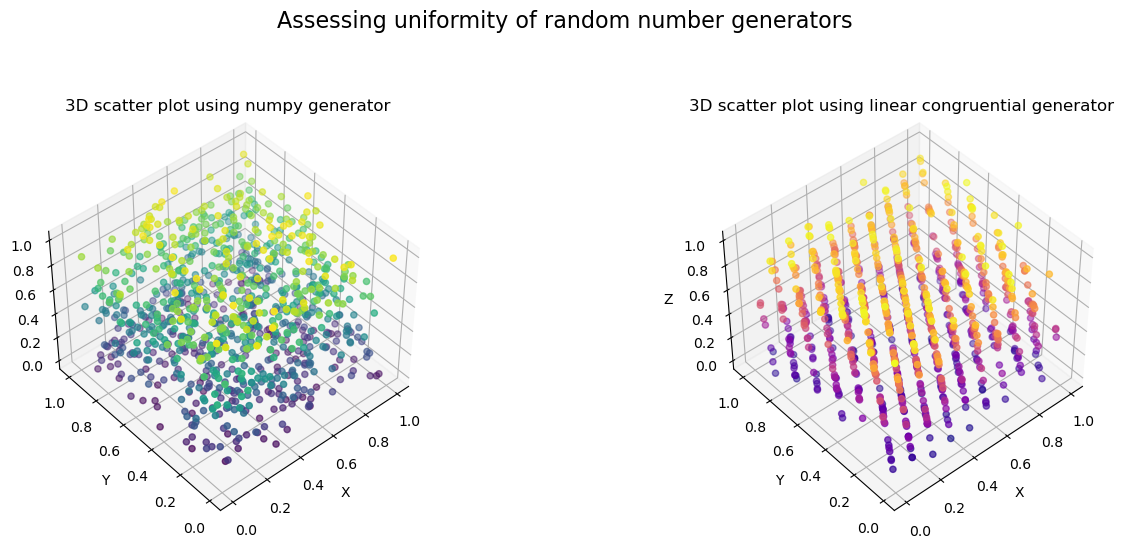

In [6]:
def plot_3D(np_x, np_y, np_z, LCG_x, LCG_y, LCG_z):
    """
    Generates an interactive 3D plot to demonstrate whether a RNG is actually uniform or not.
    
    Parameters:
    x = randomly generated x values
    y = randomly generated y values
    z = randomly generated z values
    generator_type = name of the RNG used, i.e., either numpy generator or LCG
    """
    # Create 3D subplot for numpy RNG graph
    fig = plt.figure(figsize=(11,6))

    ax1 = fig.add_subplot(121, projection='3d')  # 1 row, 2 columns, subplot 1
    ax1.scatter(np_x, np_y, np_z, marker='o', c=np_z, cmap='viridis')
    ax1.view_init(elev=44, azim=-131)
     
    # Set labels and title for numpy RNG graph
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D scatter plot using numpy generator', fontsize=12)

    # Create 3D subplot for LCG (randssp) graph
    ax2 = fig.add_subplot(122, projection='3d')  # 1 row, 2 columns, subplot 2
    ax2.scatter(LCG_x, LCG_y, LCG_z, marker='o', c=LCG_z, cmap='plasma')
    ax2.view_init(elev=44, azim=-131)

    # Set labels and title for LCG (randssp) graph
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('3D scatter plot using linear congruential generator', fontsize=12)
    
    # Set main title for the entire figure
    fig.suptitle('Assessing uniformity of random number generators', fontsize=16)

    # Adjust layout to prevent overlapping titles
    plt.tight_layout(w_pad=20)
    plt.show()

# Plot 3D random distribution using np.random.uniform() and linear congruential generator (LCG)
numpy_coords_x, numpy_coords_y, numpy_coords_z = numpy_random_coords(N_RANDOM_NUMBERS)
LCG_matrix = randssp(3, N_RANDOM_NUMBERS)   # 3 because 3 dimensions, x, y, z
plot_3D(numpy_coords_x, numpy_coords_y, numpy_coords_z, LCG_matrix[0], LCG_matrix[1], LCG_matrix[2])

These 3D plots shows that the numpy RNG is indeed uniform because there are no spectral planes. However, looking at the LCG plot from this angle identifies spectral planes where there are no points distributed, which is not truly uniform.

## Random generator for exponential distribution

To model neutrons passing through a slab of material, we need a RNG that produces samples distributed according to an exponential function,

$\exp\left( \frac{-x}{\lambda} \right)$ ,

where $\lambda$ is the mean free path. This is because the intensity variation of neutrons in a slab of material is 

$I(x) = e^{\frac{-x}{\lambda}}$,

to account for the mean free path, $\lambda$, which is the distance a neutron will travel before it undergoes a collision that will significantly alter its direction or energy state.  

$\lambda = \frac{1}{n\sigma}$, where $n = \frac{\rho N_A}{M}$ is the number of absorbing molecules and $\sigma$ is the absorption cross-section of the slab material.

In the absence of scattering, the attenuation length of water can be shown to be $\lambda = 45$ cm, which will be used as the nominal lambda value. The exp_distrib() function takes this nominal value to scale the exponential distribution appropriately, and finds a new attenuation length with errors from the random data.

In [7]:
lnominal = 45          # Nominal lambda (mean free path) value, cm

# Parameters used
nparticles = 1000      # Number of random particles generated
nbins = 33             # Number of bins in histogram
niterations = 10       # Number of iterations to take a mean over
rmax = 300             # Maximum value for the thickness of the slab

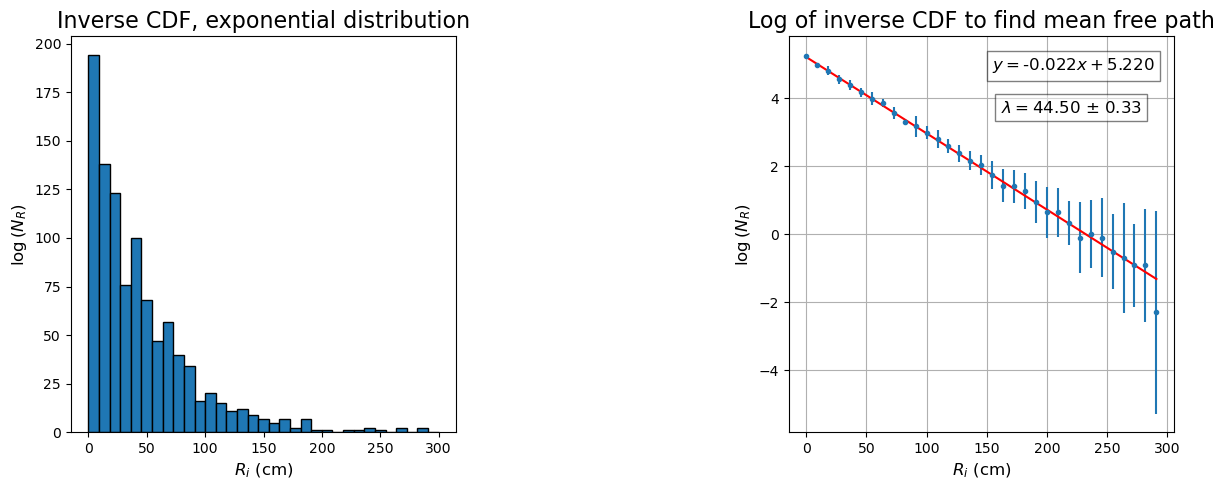

In [8]:
%matplotlib inline
%matplotlib inline
def exp_distrib(lnominal):
    """
    Calculates the inverse CDF of the exponential PDF and applies this to a  uniform distribution in order to get
    an exponential distribution. Plots a representative histogram for the final iteration to show the exponential
    distribution, and plots a log of the inverse CDF with errorbars to find calculate the mean free path from 
    the gradient value.
    
    Parameters:
    lnominal : nominal lambda (mean free path) value, 45cm
    """   
    # Creating arrays of zeros to update
    freq = np.zeros((niterations, nbins))   # niterations rows and nbins columns
    mean_freq = np.zeros(nbins)             # mean frequency of random numbers generated in a particular bin
    std_freq = np.zeros(nbins)              # standard deviation of random numbers generated in a particular bin
    total_data = []                         # total set of randomly generated data from all iterations to plot

    for i in range(niterations):
        # freq[i, j] will contain the count of values that fall into the j-th bin for the i-th iteration.
        # Ri[j] will contain the edge value of the j-th bin.
        data = -lnominal*np.log(np.random.uniform(0,1,nparticles))
        freq[i,:], Ri = np.histogram(data, bins=nbins, range=(0, rmax))
        total_data = np.append(total_data, data)

    for j in range(nbins):
        mean_freq[j] = np.mean(freq[:,j])
        std_freq[j] = np.std(freq[:,j])
    
    # Make Ri the same length as nbins
    Ri = Ri[:-1]
    
    # Delete data that corresponds to a mean frequency of zero
    mean_freq = np.delete(mean_freq, np.where(mean_freq == 0))
    std_freq = np.delete(std_freq, np.where(mean_freq == 0))
    Ri = np.delete(Ri, np.where(mean_freq == 0))
    
    # Plot histogram with all randomly generated sample data
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(121)
    ax1.hist(data, bins=nbins, range=(0, rmax), edgecolor='black')
    ax1.set_title('Inverse CDF, exponential distribution', fontsize='16')
    ax1.set_xlabel(r'$R_i$ (cm)', fontsize='12')
    ax1.set_ylabel(r'$\log\left( N_R \right)$', fontsize='12')
    
    # Fit the mean frequency data to a linear fit by taking the log and calculating the error, and uncertainty 
    # in the mean free path
    log_mean_freq = np.log(mean_freq)
    error = std_freq / mean_freq
    coef, cov = np.polyfit(Ri, np.log(mean_freq), cov=True, deg=1, w=1/error)
    fit_fn = np.poly1d(coef)
    val_lambda = -(1/coef[0])
    unc_lambda = np.sqrt(np.diag(cov))[0] / (coef[0]**2)
    
    # Plot log of inverse CDF with a line of best fit to find the fitted mean free path
    ax2 = fig.add_subplot(122)
    ax2.errorbar(Ri, log_mean_freq, (std_freq / mean_freq), marker='.', linestyle='')
    ax2.plot(Ri, fit_fn(Ri), c='red')
    
    ax2.text(0.95, 0.95, r'$y=${0:.3f}$x + ${1:.3f}'.format(coef[0], coef[1]), fontsize='12', 
             bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes, va='top', ha='right')
    ax2.text(0.55, 0.8, r'$\lambda = ${0:.2f} $\pm$ {1:.2f}'.format(val_lambda, unc_lambda), fontsize='12', 
             bbox=dict(facecolor='white', alpha=0.5), transform=plt.gca().transAxes, va='bottom', ha='left')
    
    ax2.set_title('Log of inverse CDF to find mean free path', fontsize='16')
    ax2.set_xlabel(r'$R_i$ (cm)', fontsize='12')
    ax2.set_ylabel(r'$\log\left( N_R \right)$', fontsize='12')
    ax2.grid(True)
    
    plt.tight_layout(w_pad=20)
    plt.show()
    
exp_distrib(lnominal)

With an input mean free path value of $\lambda=45$cm, the attenuation length is shown to be approximately equal to this from the line of best fit. The gradient is $m=\frac{-1}{\lambda}$ from which the attenuation length was found.

## Function to produce isotropic unit vectors
### Uniform isotropic unit vectors

In order to code for a random walk to represent the scattered neutrons, isotropic unit vectors will be required,

$\mathbf{r} = x\mathbf{\hat{i}} + y\mathbf{\hat{j}} + z\mathbf{\hat{k}}$.

This is demonstrated by the below function which displays a unit sphere of uniform distribution.

In [9]:
dimensions = 3
nparticles = 2000   # Number of particles

/var/folders/y_/5rcm3p_s02n9b1lyrn3xl0t40000gn/T/ipykernel_29939/1499164565.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(x, y, z, marker='.', cmap='viridis')


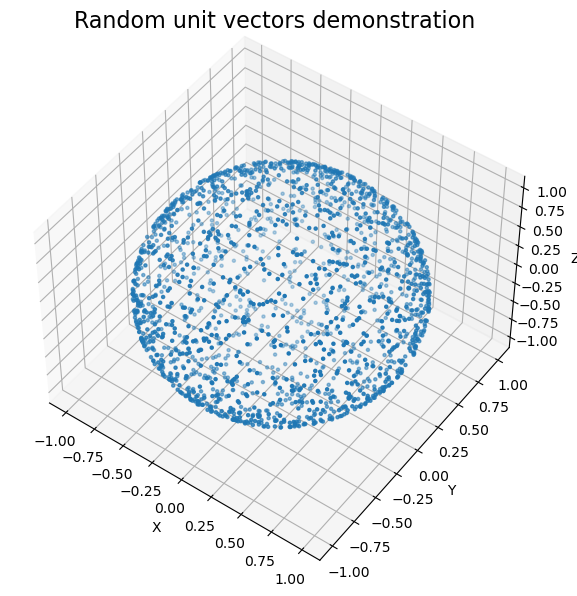

In [10]:
%matplotlib inline
def uniform_unit_vectors():
    """
    Generating random isotropic unit vectors for a random walk in a spherical distribution.
    
    Parameters:
    None
    
    Returns:
    x : uniform random-generated x-coordinates
    y : uniform random-generated y-coordinates
    z : uniform random-generated z-coordinates
    """
    r = np.random.uniform(0, 1, nparticles)
    theta = np.arccos(2 * np.random.uniform(0, 1, nparticles) - 1)
    phi = 2*np.pi * np.random.uniform(0, 1, nparticles)
    
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    fig = plt.figure(figsize=(15,15))

    ax1 = fig.add_subplot(121, projection='3d')  # 1 row, 2 columns, subplot 1
    ax1.scatter(x, y, z, marker='.', cmap='viridis')
    ax1.view_init(elev=48, azim=-54)
    
    # Set labels and title for numpy RNG graph
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Random unit vectors demonstration', fontsize=16)
    
    plt.show()
     
    return x, y, z

X, Y, Z = uniform_unit_vectors()

### Isotropic unit vectors with exponential distribution

To model the thermal neutrons, they need to have an exponential distribution for their random walk, hence the below function displays a unit sphere with exponential distribution.

/var/folders/y_/5rcm3p_s02n9b1lyrn3xl0t40000gn/T/ipykernel_29939/1945006818.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(x, y, z, marker='.', cmap='viridis')


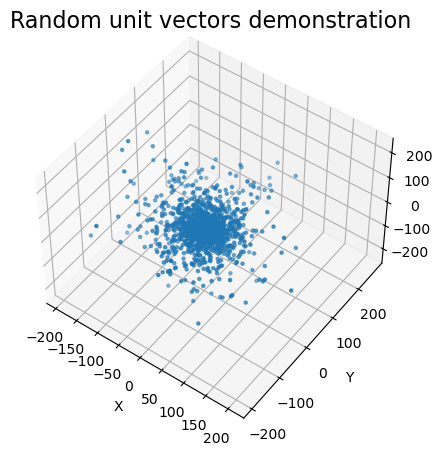

In [11]:
%matplotlib inline
def exp_unit_vectors():
    """
    Generating random isotropic unit vectors with an exponential distribution.
    
    Parameters:
    None
    
    Returns:
    x : uniform random-generated x-coordinates
    y : uniform random-generated y-coordinates
    z : uniform random-generated z-coordinates
    """
    r = lnominal*np.log(np.random.uniform(0,1,nparticles))
    theta = np.arccos(1 - (2 * np.random.uniform(0, 1, nparticles)))
    phi = 2*np.pi * np.random.uniform(0, 1, nparticles)
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    fig = plt.figure(figsize=(10,5))

    ax1 = fig.add_subplot(111, projection='3d')  # 1 row, 2 columns, subplot 1
    ax1.scatter(x, y, z, marker='.', cmap='viridis')
    ax1.view_init(elev=48, azim=-54)
    
    # Set labels and title for numpy RNG graph
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Random unit vectors demonstration', fontsize=16)
    
    plt.show()
     
    #return x, y, z
    
exp_unit_vectors()

## Determining Material Properties

Water, lead and graphite have the following properties:
<div style="margin-left: 0;">

|      | Water    | Lead    | Graphite     |
|--------------|--------------|--------------|--------------|
| Absorption cross-section, $\sigma_a$ (barn)| 0.6652|0.158 | 0.0045 |
| Scattering cross-section, $\sigma_s$ (barn)| 103.0 | 11.221 | 4.74|
| Density, $\rho$ (g/cm$^3$)| 1.00 | 11.35 | 1.67 |
| Molar mass, M (g/mol)| 18.0153 | 207.2 |12.011 |

These can be used to find the macroscopic absorption cross-section $\Sigma_A$, macroscopic scattering cross-section $\Sigma_S$, and total mean free path $\lambda_T$, i.e., the mean free path taking both $\Sigma_A$ and $\Sigma_S$ into account. They are calculated according to the following equations:
    
$n = \frac{\rho N_A}{M}$,
    
where $n$ = number of absorbing molecules (cm$^{-3}$) and $N_A = 6.022 \times 10^{23}$ mol$^{-1}$ = Avogadro's constant. Then,

$\Sigma = n\sigma$,

$\Sigma_T = \Sigma_A + \Sigma_S = $ total macroscopic cross-section,

$\lambda_T = \frac{1}{\Sigma_T}$.
    
These values can then be used later in the programme to find the probability of absorption and code the random walk that neutrons take in the material.

In [12]:
# Water properties
W_SIGMA_A = 0.6652       # absorption cross-section, barns
W_SIGMA_S = 103.0        # scattering cross-section, barns
W_DENSITY = 1.00         # g/cm^3
W_MOLAR_MASS = 18.0153   # g/mol

# Lead properties
L_SIGMA_A = 0.158      # absorption cross-section, barns
L_SIGMA_S = 11.221     # scattering cross-section, barns
L_DENSITY = 11.35      # g/cm^3
L_MOLAR_MASS = 207.2   # g/mol

# Graphite properties
G_SIGMA_A = 0.0045      # absorption cross-section, barns
G_SIGMA_S = 4.74        # scattering cross-section, barns
G_DENSITY = 1.67        # g/cm^3
G_MOLAR_MASS = 12.011   # g/mol

N_A = 6.02214076e23    # Avogadro's constant, mol^-1

In [13]:
def determining_properties(sigma_A, sigma_S, density, molar_mass):
    """
    Calculates macroscopic absorption and scattering cross-sections, as well as total mean free path.
    
    Parameters:
    sigma_A = absorption cross-section of material, barns
    sigma_S = scattering cross-section of material, barns
    density = density of material, g/cm^3
    molar_mass = molar mass of material, g/mol
    
    Returns:
    macro_sigma_A = macroscopic absorption cross-section of material, cm^-1
    macro_sigma_S = macroscopic scattering cross-section of material, cm^-1
    tot_lambda = total mean free path, cm
    """
    n = (density * N_A) / molar_mass                   # Number of absorbing molecules, cm^-3
    macro_sigma_A = n * sigma_A * 10**(-24)            # Macroscopic absorption cross-section, cm^-1
    macro_sigma_S = n * sigma_S * 10**(-24)            # Macroscopic scattering cross-section, cm^-1
    tot_lambda = 1 / (macro_sigma_A + macro_sigma_S)   # Total mean free path, cm
    
    return macro_sigma_A, macro_sigma_S, tot_lambda

W_MACRO_SIGMA_A, W_MACRO_SIGMA_S, W_TOT_LAMBDA = determining_properties(W_SIGMA_A, W_SIGMA_S, W_DENSITY, 
                                                                        W_MOLAR_MASS)
L_MACRO_SIGMA_A, L_MACRO_SIGMA_S, L_TOT_LAMBDA = determining_properties(L_SIGMA_A, L_SIGMA_S, L_DENSITY, 
                                                                        L_MOLAR_MASS)
G_MACRO_SIGMA_A, G_MACRO_SIGMA_S, G_TOT_LAMBDA = determining_properties(G_SIGMA_A, G_SIGMA_S, G_DENSITY, 
                                                                        G_MOLAR_MASS)
print('WATER : ')
print('Macroscopic absorption cross-section: {0:.3e} cm^-1, macroscopic scattering cross-section: {1:.3e} cm^-1,\
        total mean free path: {2:.3e} cm'.format(W_MACRO_SIGMA_A, W_MACRO_SIGMA_S, W_TOT_LAMBDA))
print('LEAD : ')
print('Macroscopic absorption cross-section: {0:.3e} cm^-1, macroscopic scattering cross-section: {1:.3e} cm^-1,\
        total mean free path: {2:.3e} cm'.format(L_MACRO_SIGMA_A, L_MACRO_SIGMA_S, L_TOT_LAMBDA))
print('GRAPHITE : ')
print('Macroscopic absorption cross-section: {0:.3e} cm^-1, macroscopic scattering cross-section: {1:.3e} cm^-1,\
        total mean free path: {2:.3e} cm'.format(G_MACRO_SIGMA_A, G_MACRO_SIGMA_S, G_TOT_LAMBDA))

WATER : 
Macroscopic absorption cross-section: 2.224e-02 cm^-1, macroscopic scattering cross-section: 3.443e+00 cm^-1,        total mean free path: 2.886e-01 cm
LEAD : 
Macroscopic absorption cross-section: 5.212e-03 cm^-1, macroscopic scattering cross-section: 3.702e-01 cm^-1,        total mean free path: 2.664e+00 cm
GRAPHITE : 
Macroscopic absorption cross-section: 3.768e-04 cm^-1, macroscopic scattering cross-section: 3.969e-01 cm^-1,        total mean free path: 2.517e+00 cm


## Visualising Neutron Random Walk

This section demonstrates the random walk of three thermal neutrons within a slab of thickness $L$ of each material: water, lead and graphite. It is a 3-dimensional random walk with exponential distribution, and it continues until the neutron is either absorbed, or escapes the slab via transmission or reflection.

The neutron enters the slab from the left and its first step is normal to the slab going into it. 

In [14]:
L = 10 # cm, thickness of slab
# Calculating probabilities of absorption for each material 
W_Pa = W_MACRO_SIGMA_A / (W_MACRO_SIGMA_A + W_MACRO_SIGMA_S)
L_Pa = L_MACRO_SIGMA_A / (L_MACRO_SIGMA_A + L_MACRO_SIGMA_S)
G_Pa = G_MACRO_SIGMA_A / (G_MACRO_SIGMA_A + G_MACRO_SIGMA_S)

MATERIAL = ['water', 'lead', 'graphite']
TOT_LAMBDA = [W_TOT_LAMBDA, L_TOT_LAMBDA, G_TOT_LAMBDA]
MACRO_SIGMA_A = [W_MACRO_SIGMA_A, L_MACRO_SIGMA_A, G_MACRO_SIGMA_A]
PA = [W_Pa, L_Pa, G_Pa]

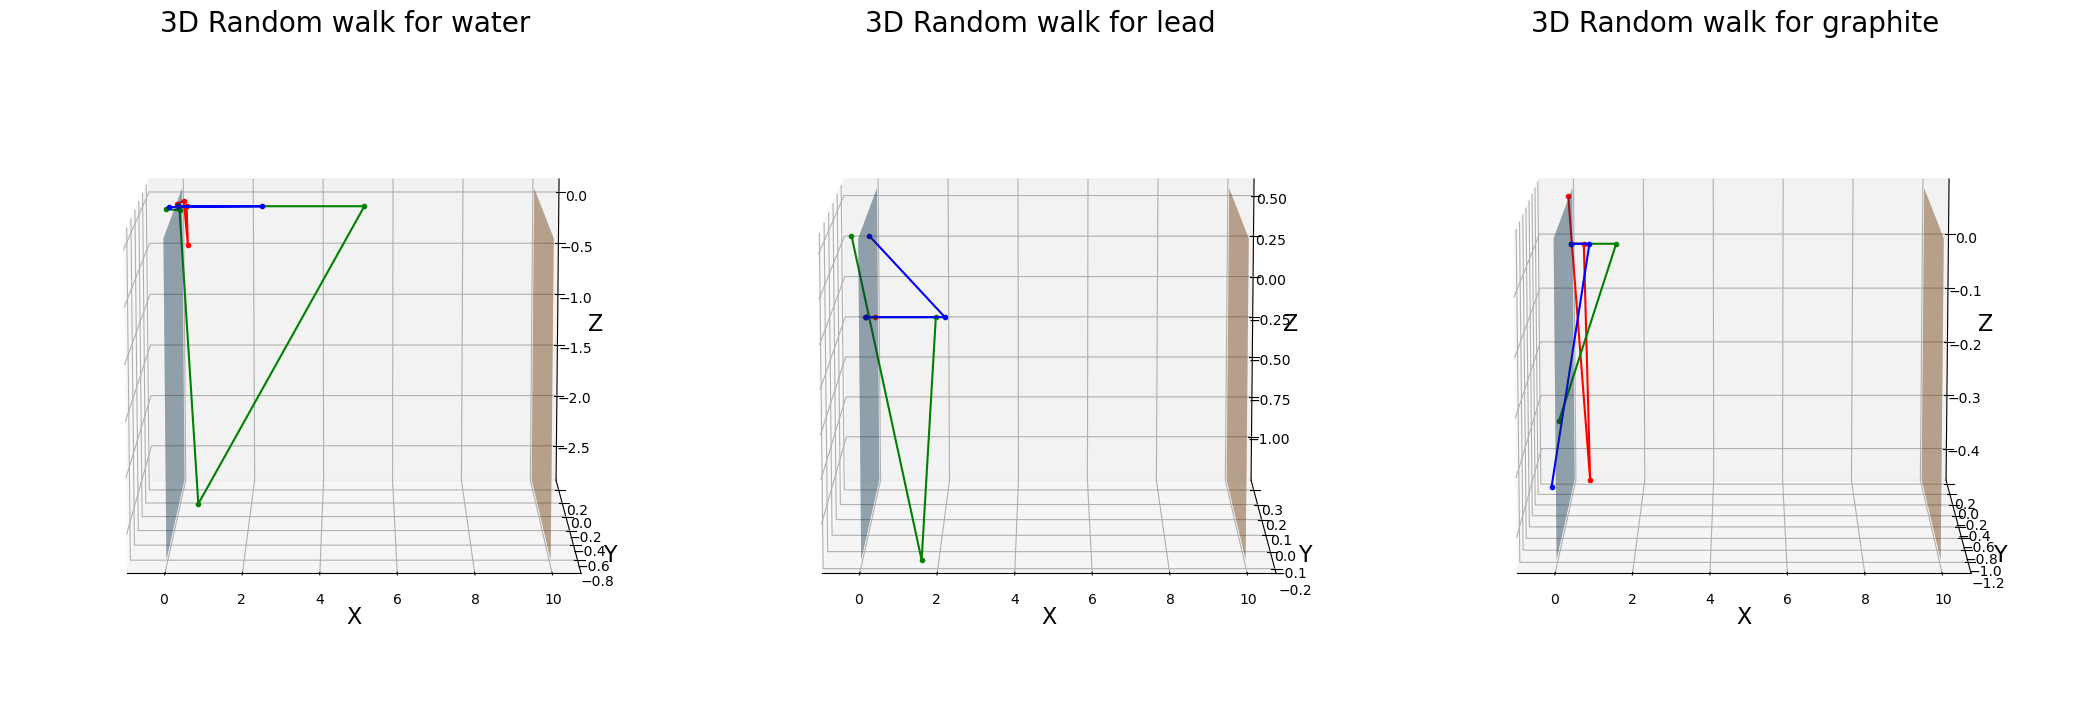

In [15]:
%matplotlib inline

def visualising_random_walk():
    """
    Generates coordinates for a random walk and plots it for visualisation.
    
    Parameters: None
    Returns : None
    """
    num_rows = 1
    num_cols = len(MATERIAL)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 7), subplot_kw={'projection': '3d'})
    
    for i, material in enumerate(MATERIAL):
        ax = axs[i]
        
        neutron_colours = ['red', 'green', 'blue']
        
        # Create empty lists for recording min and max y and z coordinates to scale shaded planes on graphs
        y_min = np.zeros(3)
        y_max = np.zeros(3)
        z_min = np.zeros(3)
        z_max = np.zeros(3)
        # Iterate for three neutrons
        for i in range(len(neutron_colours)):
            # Create array for positions for x,y,z
            x = [0]
            y = [0]
            z = [0]

            # First step being only in the +x direction
            x.append(-TOT_LAMBDA[i]*np.log(np.random.uniform()))
            y.append(0)
            z.append(0)

            v = np.random.uniform(0,1)

            # Iterate while neutron is within slab and not been absorbed
            while (x[-1] > 0) & (x[-1] < L) & (v > PA[i]):
                # Generate random directions for each step
                r = -TOT_LAMBDA[i]*np.log(np.random.uniform(0,1))
                theta = np.arccos(1 - (2 * np.random.uniform(0,1)))
                phi = 2*np.pi * np.random.uniform(0,1)

                # Generate random step for each coordinate for each step
                x_walk = r * np.sin(theta) * np.cos(phi)
                y_walk = r * np.sin(theta) * np.sin(phi)
                z_walk = r * np.cos(theta)

                # Update position by adding step to current position
                x.append(x_walk)
                y.append(y_walk)
                z.append(z_walk)

                v = np.random.uniform(0,1)
        
            # Plot random walk
            ax.plot(x, y, z, marker='.', c=neutron_colours[i])
            
            # Record min and max y and z values for scaling shaded planes
            y_min[i] = np.min(y)
            y_max[i] = np.max(y)
            z_min[i] = np.min(z)
            z_max[i] = np.max(z)
            
        y_plane = np.linspace(np.min(y_min), np.max(y_max), 100)
        z_plane = np.linspace(np.min(z_min), np.max(z_max), 100)
        Y, Z = np.meshgrid(y_plane, z_plane)
            
        X_zero = np.zeros_like(Y)
        X_L = np.zeros_like(Y)
        X_L[X_L == 0] = L

        ax.plot_surface(X_zero, Y, Z, alpha=0.5)
        ax.plot_surface(X_L, Y, Z, alpha=0.5)
        ax.set_title('3D Random walk for '+material, fontsize='20')
        ax.set_xlabel('X', fontsize='16')
        ax.set_ylabel('Y', fontsize='16')
        ax.set_zlabel('Z', fontsize='16')
        ax.view_init(elev=10, azim=-90)

    plt.tight_layout()
    plt.show()

visualising_random_walk()

## Quantifying Scattering Processes

The random walk process is now applied to a much higher number of neutrons, and similarly each neutron's walk will end either in transmission, reflection or absorption, which is recorded in the function. This scattering process is repeated, and the mean numbers of transmitted, reflected and absorbed neutrons are calculated along with their standard deviations and the errors in the mean values. 

The means can then be plotted on a pie chart to show the proportions of neutrons that are transmitted, reflected and absorbed for each material. This is all calculated for a set thickness of the slab, at $10$ cm. 

In [16]:
THICKNESS = 10   # Thickness of slab, cm
Niterations = 10   # Number of iterations for the neutron random walk function
Nneutrons = 10000   # Number of neutrons

In [17]:
%matplotlib inline

def neutron_random_walk(tot_lambda, macro_sigma_A, Pa, L):
    """
    Generates coordinates for a random walk for many neutrons and keeps record of the number that are transmitted,
    reflected and absorbed until they've all stopped random-walking. Also calculates the mean, standard deviation,
    and errors on these numbers over several iterations.
    
    Parameters :
    lamdba_tot : total mean free path for a material
    macro_sigma_A : macroscopic absorption cross-section in a material
    Pa : probability that a neutron will be absorbed in a material
    
    Returns :
    N_T : number of neutrons transmitted
    N_R : number of neutrons reflected
    N_A : number of neutrons absorbed
    """
    
    N_T_arr = np.zeros(Niterations)
    N_R_arr = np.zeros(Niterations)
    N_A_arr = np.zeros(Niterations)

    # Iterating the process to get means and errors
    for i in range(Niterations):
        N_T = 0
        N_R = 0
        N_A = 0 
        
        # Create first step for all particles at once in the +x direction only
        x = -tot_lambda*np.log(np.random.uniform(0,1, Nneutrons))
    
        # Iterate until no neutrons left
        while len(x) > 0:
        
            # Transmitted neutrons
            N_T += np.count_nonzero(x > L)
        
            # Reflected neutrons
            N_R += np.count_nonzero(x < 0)
        
            # Absorbed neutrons
            v = np.random.uniform(size=len(x))   # Random numbers of same length as x
            N_A += np.count_nonzero(v[np.argwhere((x>0) & (x<L))] < Pa)
            x = np.delete(x, np.argwhere((x<0) | (x>L) | (v < Pa)))
        
            phi = 2*np.pi * np.random.uniform(0, 1, len(x))
            theta = np.arccos(1 - (2 * np.random.uniform(0, 1, len(x))))
            x += -tot_lambda*np.log(np.random.uniform(0,1, len(x))) * np.cos(phi) * np.sin(theta)
        
        N_T_arr[i] = N_T
        N_R_arr[i] = N_R
        N_A_arr[i] = N_A
    
    # Calculate means for each process
    mean_N_T = np.mean(N_T_arr)
    mean_N_R = np.mean(N_R_arr)
    mean_N_A = np.mean(N_A_arr)
    
    # Calculate standard deviations for each process
    std_N_T = np.std(N_T_arr)
    std_N_R = np.std(N_R_arr)
    std_N_A = np.std(N_A_arr)
    
    # Calculate errors for each process where mean and std.dev are not zero
    error_N_T = std_N_T / mean_N_T if (mean_N_T != 0) & (std_N_T != 0) else 0
    error_N_R = std_N_R / mean_N_R if (mean_N_R != 0) & (std_N_R != 0) else 0
    error_N_A = std_N_A / mean_N_A if (mean_N_A != 0) & (std_N_A != 0) else 0
    
    return mean_N_T, mean_N_R, mean_N_A, error_N_T, error_N_R, error_N_A

# Will get mean value back, and error which will be either some non-zero error or "None" to avoid RunTime Error
MEAN_N_T, MEAN_N_R, MEAN_N_A, ERROR_N_T, ERROR_N_R, ERROR_N_A = neutron_random_walk(W_TOT_LAMBDA, W_MACRO_SIGMA_A, 
                                                                                   W_Pa, THICKNESS)

In [18]:
# Printing results for water
print('Transmission Through A Fixed Thickness - Water:')
print('-----------------------------------------------')
print('Thickness : {0} cm'.format(THICKNESS))
print('Total Neutrons : {0}'.format(Nneutrons))
print('Neutrons Reflected : mean = {0:.0f} \u00B1 {1:.3f}'.format(MEAN_N_R, ERROR_N_R))
print('Neutrons Absorbed : mean = {0:.0f} \u00B1 {1:.3f}'.format(MEAN_N_A, ERROR_N_A))
print('Neutrons Transmitted : mean = {0:.0f} \u00B1 {1:.3f}'.format(MEAN_N_T, ERROR_N_T))
print('Percentage Transmitted : ({0:.1f} \u00B1 {1:.0e}) %'.format(((MEAN_N_T / Nneutrons) * 100), ((ERROR_N_T / MEAN_N_T) * 100)))

Transmission Through A Fixed Thickness - Water:
-----------------------------------------------
Thickness : 10 cm
Total Neutrons : 10000
Neutrons Reflected : mean = 7954 ± 0.003
Neutrons Absorbed : mean = 2013 ± 0.010
Neutrons Transmitted : mean = 33 ± 0.174
Percentage Transmitted : (0.3 ± 5e-01) %


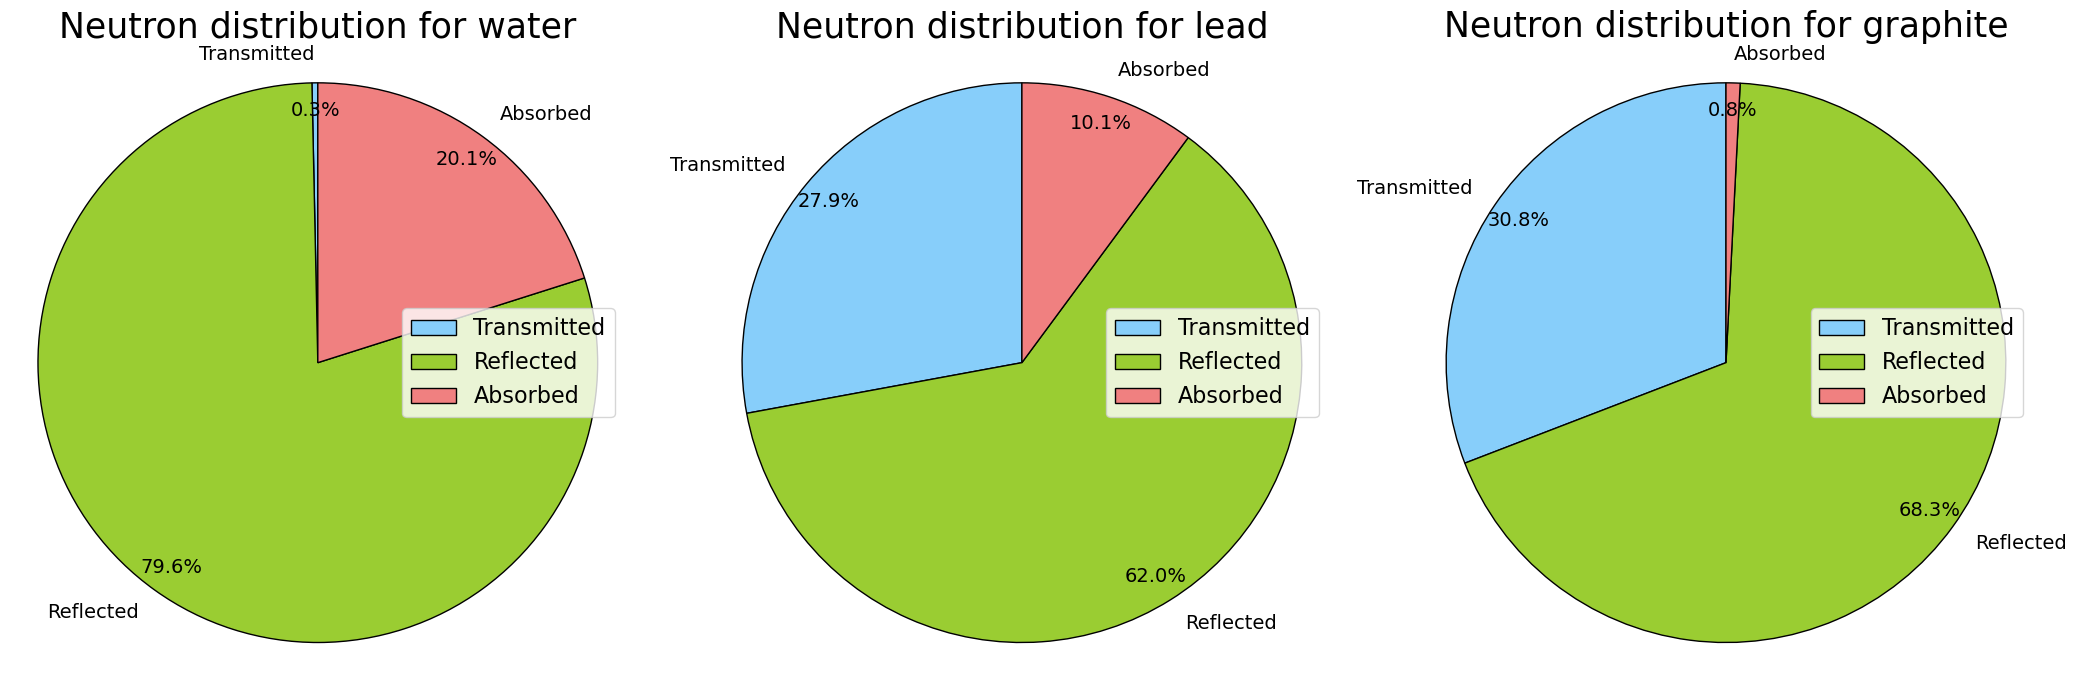

In [19]:
def plot_scattering_data():
    """
    Plots a pie chart for visualising how many neutrons are transmitted, reflected and absorbed.
    
    Parameters:
    N_T : number of neutrons transmitted
    N_R : number of neutrons reflected
    N_A : number of neutrons absorbed
    """
    # To get three graphs printed in the same row, specify number of rows and columns
    num_rows = 1
    num_cols = len(MATERIAL)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 7))
    
    for i, material in enumerate(MATERIAL):
        labels = ['Transmitted', 'Reflected', 'Absorbed']
        colours = ['lightskyblue', 'yellowgreen', 'lightcoral']
        mean_N_T, mean_N_R, mean_N_A, _, _, _ = neutron_random_walk(TOT_LAMBDA[i], MACRO_SIGMA_A[i], PA[i], THICKNESS)
        sizes = [mean_N_T, mean_N_R, mean_N_A] 

        ax = axs[i]
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.9, startangle=90, 
                wedgeprops=dict(edgecolor='black'), textprops={'fontsize': 14}, colors=colours)

        ax.axis('equal')   # Equal aspect ratio ensures that pie is drawn as a circle
        ax.set_title('Neutron distribution for '+material, fontsize='25')
        ax.legend(labels, loc='right', fontsize=16)
        
    plt.tight_layout()
    plt.show()

plot_scattering_data()

These graphs show that water has the highest proportion of reflected neutrons, and the highest proportion of abosrbed neutrons, but the lowest proportion of transmitted neutrons. 

## Plotting Variations in Slab Thickness

The model is then run again but for several different slab thicknesses between $0 - 20$ cm, to observe the effect of slab thickness on the proportion of neutrons transmitted, reflected and absorbed for each material. 

In [20]:
thickness = np.linspace(0, 20, 20)   # 

Processing Materials:   0%|          | 0/3 [00:00<?, ?it/s]

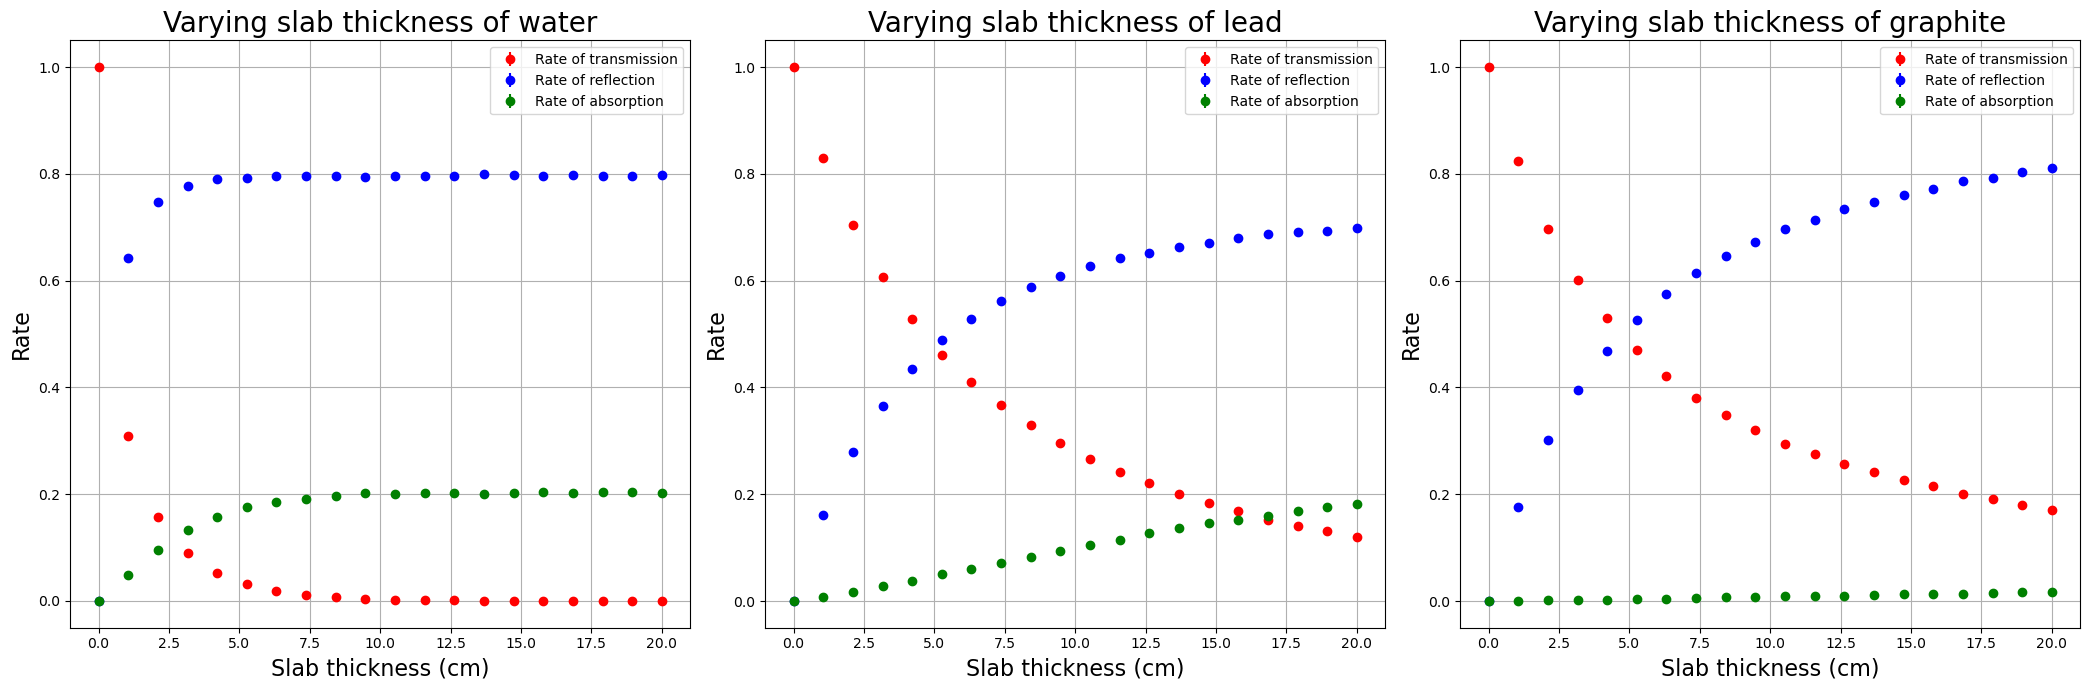

In [21]:
def plotting_variations_thickness():
    """
    Running the scattering process function for different slab thicknesses.
    
    Parameters: None
    Returns:
    N_T_all : mean number of transmitted neutrons, 2D array with a row for each material and a column for each 
                thickness modelled
    N_T_error : error in mean number of transmitted neutrons, 2D array with a row for each material and a column 
                for each thickness modelled
    """
    # To get three graphs printed in the same row, specify number of rows and columns
    num_rows = 1
    num_cols = len(MATERIAL)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 7))
    
    # Create empty arrays for mean transmission, reflection and absorption and for their errors, 
    # with a row for each material, and a column for each slab thickness modelled
    N_T_all = np.zeros((3, len(thickness)))
    N_R_all = np.zeros((3, len(thickness)))
    N_A_all = np.zeros((3, len(thickness)))
    N_T_error = np.zeros((3, len(thickness)))
    N_R_error = np.zeros((3, len(thickness)))
    N_A_error = np.zeros((3, len(thickness)))
    
    # Iterating through each material
    for i in tnrange(len(MATERIAL), desc='Processing Materials'):
        material = MATERIAL[i]

        # Iterating through the different thicknesses of slab
        for t in range(len(thickness)):
            N_T_all[i, t], N_R_all[i, t], N_A_all[i, t], N_T_error[i, t], N_R_error[i, t], N_A_error[i, t] = neutron_random_walk(TOT_LAMBDA[i], 
                                                                                        MACRO_SIGMA_A[i], PA[i], thickness[t])
        # Plot these values
        ax = axs[i]
        ax.errorbar(thickness, (N_T_all[i,:]/Nneutrons), yerr=(N_T_error[i,:]/Nneutrons), marker='o', linestyle=' ', 
                    color='red', label='Rate of transmission')
        ax.errorbar(thickness, (N_R_all[i,:]/Nneutrons), yerr=(N_R_error[i,:]/Nneutrons), marker='o', linestyle=' ', 
                    color='blue', label='Rate of reflection')
        ax.errorbar(thickness, (N_A_all[i,:]/Nneutrons), yerr=(N_A_error[i,:]/Nneutrons), marker='o', linestyle=' ', 
                    color='green', label='Rate of absorption')

        ax.set_title('Varying slab thickness of '+material, fontsize='20')
        ax.set_xlabel('Slab thickness (cm)', fontsize='16')
        ax.set_ylabel('Rate', fontsize='16')
        ax.legend()
        ax.grid(True)
        
    plt.tight_layout()
    plt.show()
    
    # Only return transmission mean and error, these are all that's needed for finding attenuation length
    return N_T_all, N_T_error   

# N_T holds mean transmission for all three materials, N_T_ERR holds 
N_T, N_T_ERR = plotting_variations_thickness()

These graphs show that for all three materials the rate of reflection increases with slab thickness, the rate of transmission exponentially decays, and the rate of absorption rises for all three materials. The thickness of a "slab" of water stops having an effect on the different rates the earliest, at approximately 5.0 cm, whereas the thickness of lead and graphite continue to affect the rates at larger thicknesses.

## Determining Attenuation Lengths

Using the transmission rates for each material, the characteristic attenuation lengths can be calculated similarly to the Random Generator for Exponential Distribution section. The log of the rate is taken to plot a linear graph against thickness, from which the characteristic attenuation length can be extracted as $\lambda = -\frac{1}{m}$ where $m$ is the gradient. 

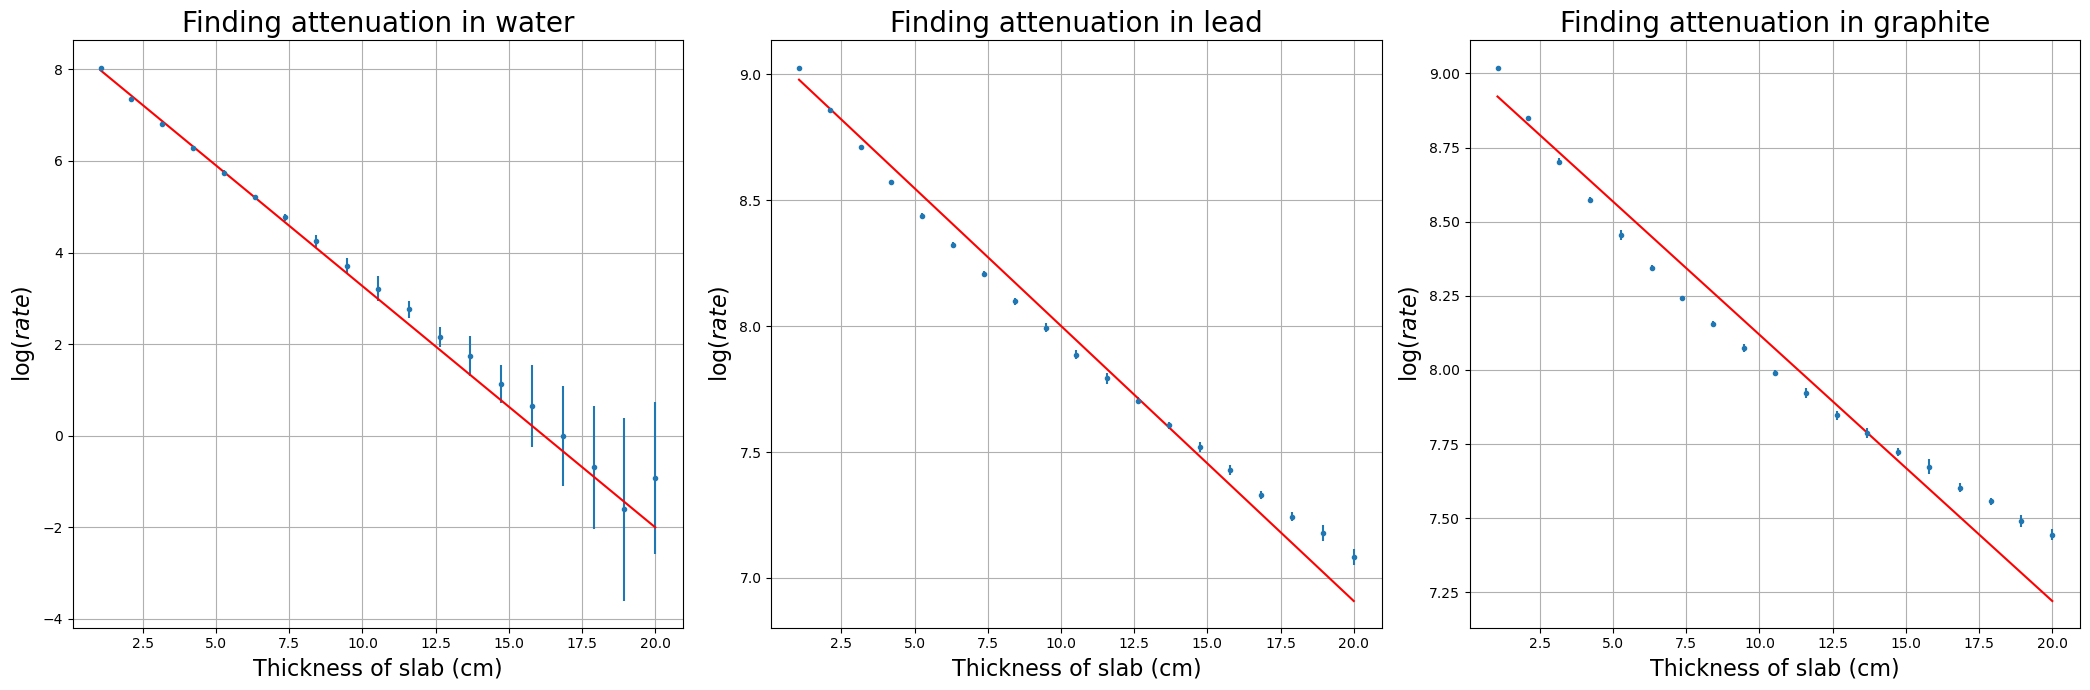

In [22]:
def attenuation_length(N_T, N_T_error, thickness):
    """
    Determining attenuation length similarly to the Random Generator for Exponential Distribution section - taking
    log of the mean number of transmitted neutrons (N_T) and using np.polyfit to fit a linear distribution. The
    attenuation length is found from -1/gradient of the fitted line and includes uncertainty. 
    
    Parameters:
    N_T : mean number of transmitted neutrons, 2D array with a row for each material and a column for each 
                thickness modelled
    N_T_error : error in mean number of transmitted neutrons, 2D array with a row for each material and a column 
                for each thickness modelled
    thickness : np.linspace for the different slab thickness values modelled. 
    
    Returns: None
    """
    num_rows = 1
    num_cols = len(MATERIAL)
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 7))
    
    # Create empty matrix to update with results, one row for each material, a column each for attenuation length
    # and error in attenuation length 
    results_matrix = np.zeros((3,2))
    for i, material in enumerate(MATERIAL):
        
        N_T_valid = np.delete(N_T[i], np.argwhere((N_T[i] == 0) | (N_T_error[i] == 0)))
        N_T_error_valid = np.delete(N_T_error[i], np.argwhere((N_T[i] == 0) | (N_T_error[i] == 0)))
        thickness_updated = np.delete(thickness, np.argwhere((N_T[i] == 0) | (N_T_error[i] == 0)))

        log_N_T = np.log(N_T_valid)

        coef, cov = np.polyfit(thickness_updated, log_N_T, cov=True, deg=1, w=1/N_T_error_valid)
        fit_fn = np.poly1d(coef)
        att_length = -(1/coef[0])    # The attenuation length is -1/gradient
        results_matrix[i,0] = att_length
        unc_att_length = np.sqrt(np.diag(cov))[0] / (coef[0]**2)
        results_matrix[i,1] = unc_att_length
        
        ax = axs[i]
        ax.errorbar(thickness_updated, log_N_T, N_T_error_valid, marker='.', linestyle='')
        ax.plot(thickness_updated, fit_fn(thickness_updated), c='red')
        
        ax.set_title('Finding attenuation in '+material, fontsize='20')
        ax.set_xlabel(r'Thickness of slab (cm)', fontsize='16')
        ax.set_ylabel(r'$\log(rate)$', fontsize='16')
        ax.grid(True)
        
        #print("For "+material+", attenuation length = {0:.2f} \u00B1 {1:.2f} cm".format(att_length, unc_att_length))
    plt.tight_layout()
    plt.show()
    
    return results_matrix

ATT_RESULTS = attenuation_length(N_T, N_T_ERR, thickness)

In [23]:
RESULTS_TABLE = [
    ["Material", "Attenuation length (cm)", "Uncertainty (cm)"],
    ["Water", np.round(ATT_RESULTS[0,0], decimals=2), ("\u00B1 "+str(np.round(ATT_RESULTS[0,1], decimals=2)))],
    ["Lead", np.round(ATT_RESULTS[1,0], decimals=2), ("\u00B1 "+str(np.round(ATT_RESULTS[1,1], decimals=2)))],
    ["Graphite", np.round(ATT_RESULTS[2,0], decimals=2), ("\u00B1 "+str(np.round(ATT_RESULTS[2,1], decimals=2)))]
]

# Print the table
for row in RESULTS_TABLE:
    print("{:<10} {:^24} {:^10}".format(*row))

Material   Attenuation length (cm)  Uncertainty (cm)
Water                1.9              ± 0.03  
Lead                 9.16             ± 0.23  
Graphite            11.14             ± 0.5   


# Woodcock Method

The Woodcock method is useful for modelling neutrons passing through a bi-layer slab of two different materials, e.g. 10cm of lead next to 10cm of water.

It uses the notion of "fictional steps" when modelling the neutrons' random walks. Since the different materials have different macroscopic cross-sections, $\Sigma$, and mean free paths, $\lambda$, the shortest mean free path $\lambda_T$ and largest macroscopic cross-section $\Sigma_T$ are used for the whole slab. This means that for the material with the longer mean free path, $\lambda_T$ is too short for a real step, so it must take one or more "fictional" steps in the same direction. 

Hence, in the following code, neutrons are assessed to see which material they are in, and hence whether their next step will be real or fictional. In the slab with the $\Sigma = \Sigma_T$, the steps are always real, and so there is no need to check whether they are fictional or not. However, in the other material, fictional steps can only move in the same direction as the previous step. 

The different materials also have different absorption cross-sections, which are evaluated accordingly to find the rates of absorption.

In [24]:
# Stating the relevant properties of each material
L = 10   # cm, thickness of slab

MATERIAL = ['water', 'lead', 'graphite']
PA = [W_Pa, L_Pa, G_Pa]   # Probabilities of absorption for each material 

MACRO_SIGMA_A = np.array([W_MACRO_SIGMA_A, L_MACRO_SIGMA_A, G_MACRO_SIGMA_A])   # Absorption cross-sections
MACRO_SIGMA_S = np.array([W_MACRO_SIGMA_S, L_MACRO_SIGMA_S, G_MACRO_SIGMA_S])   # Scattering cross-sections

In [25]:
Niterations = 10
Nneutrons = 10000
L = 5#cm

def woodcock_random_walk(j, material, L):
    """
    Generates coordinates for a random walk for many neutrons through a bilayer of two different materials and 
    keeps record of the number that are transmitted, reflected and absorbed until they've all stopped 
    random-walking. Also calculates the mean, standard deviation, and errors on these numbers over several 
    iterations. 
    
    Parameters : 
    j : index for which material to use when calling property arrays
    material : type of material being used in first slab
    L : thickness of each slab - total thickness of bilayer slab is 2L
    
    Returns : None
    """
    
    N_T_arr = np.zeros(Niterations)
    N_R_arr = np.zeros(Niterations)
    N_A_arr = np.zeros(Niterations)
   
    macro_sigma = MACRO_SIGMA_A + MACRO_SIGMA_S
    
    # Find majorant cross-section
    macro_sigma_T = macro_sigma[0]
        
    # Find shortest mean free path
    lambda_T = 1/macro_sigma_T
    
    # Calculate probability of fictitious step in vacuum
    P_fic = macro_sigma[j] / macro_sigma_T
    
    # Calculate probability of absorption for each layer
    P_ab_1 = PA[j]
    P_ab_2 = PA[0]

    # Iterating the process to get means and errors
    for i in tnrange(Niterations, desc = f"Bilayer slab of {material} and water"):

        # Create first step for all particles at once in the +x direction only
        r = -lambda_T*np.log(np.random.uniform(0,1, Nneutrons))
        theta = np.full(Nneutrons, np.pi/2)
        phi = np.zeros(Nneutrons)
        x = r * np.sin(theta) * np.cos(phi)

        # Iterate until no neutrons left
        while len(x) > 0:
        
            # Is neutron in slab?
            N_T_arr[i] += np.count_nonzero(x > (2*L))   # Transmitted neutrons
            N_R_arr[i] += np.count_nonzero(x < 0)   # Reflected neutrons
            
            # Delete escaped neutrons
            theta = np.delete(theta, np.argwhere((x<0) | (x>(2*L))))
            phi = np.delete(phi, np.argwhere((x<0) | (x>(2*L))))
            x = np.delete(x, np.argwhere((x<0) | (x>(2*L)) ))

            
            # Create array for labelling which neutron is currently fictitious
            fict = np.full(len(x), False)
            
            # Count the number of absorbed neutrons in both lead and water
            v = np.random.uniform(0,1, len(x))                # Random numbers for calculating fictitious neutrons
            fict[np.argwhere((x < L) & (v > P_fic))] = True   # Fictitious neutrons in material 1
            
            u = np.random.uniform(0, 1, size=len(x))                # Random numbers for checking Pa
            absorbed_mat1_indices = np.argwhere((u<P_ab_1) & (0<x) & (x<L) & (fict==False))   # Number absorbed in lead
            absorbed_mat2_indices = np.argwhere((u<P_ab_2) & (x>L) & (x<(2*L)))              # Number absorbed in water
            N_A_indices = np.append(absorbed_mat1_indices, absorbed_mat2_indices)
            
            N_A_arr[i] += len(N_A_indices)
            
            # Delete absorbed neutrons from arrays  
            fict = np.delete(fict, N_A_indices)
            x = np.delete(x, N_A_indices)
            
            theta_fict = np.delete(theta, N_A_indices)
            phi_fict = np.delete(phi, N_A_indices)
            
            theta = np.arccos(1 - 2 * np.random.uniform(0, 1, size=len(x)))
            phi = np.random.uniform(0, 2*np.pi, size=len(x))
            
            theta[np.argwhere(fict == True)] = theta_fict[np.argwhere(fict == True)]
            phi[np.argwhere(fict == True)] = phi_fict[np.argwhere(fict == True)]
            
            # Choose new step size & move step for ALL neutron steps
            r = -lambda_T*np.log(np.random.uniform(0,1, len(x)))
            x += r * np.sin(theta) * np.cos(phi)
    
    # Calculate means for each process
    mean_N_T = np.mean(N_T_arr)
    mean_N_R = np.mean(N_R_arr)
    mean_N_A = np.mean(N_A_arr)
    
    # Calculate standard deviations for each process
    std_N_T = np.std(N_T_arr)
    std_N_R = np.std(N_R_arr)
    std_N_A = np.std(N_A_arr)
    
    # Calculate errors for each process where mean and std.dev are not zero
    error_N_T = std_N_T / mean_N_T if (mean_N_T != 0) & (std_N_T != 0) else 0
    error_N_R = std_N_R / mean_N_R if (mean_N_R != 0) & (std_N_R != 0) else 0
    error_N_A = std_N_A / mean_N_A if (mean_N_A != 0) & (std_N_A != 0) else 0
    
    transmission_rate = (mean_N_T / Nneutrons) * 100
    reflection_rate = (mean_N_R / Nneutrons) * 100
    absorption_rate = (mean_N_A / Nneutrons) * 100
    transmission_error = (error_N_T / mean_N_T) * 100 if (mean_N_T != 0) & (std_N_T != 0) else 0
    reflection_error = (error_N_R / mean_N_R) * 100 if (mean_N_T != 0) & (std_N_T != 0) else 0
    absorption_error = (error_N_A / mean_N_A) * 100 if (mean_N_T != 0) & (std_N_T != 0) else 0
    
    SUM = MEAN_N_T + MEAN_N_R + MEAN_N_A
    print(L,f"cm {material} and ",L,"cm water :")
    print("Percentage transmitted : {0:.3f} \u00B1 {1:.1e} %".format(transmission_rate, transmission_error))
    print("Percentage reflected : {0:.3f} \u00B1 {1:.1e} %".format(reflection_rate, reflection_error))
    print("Percentage absorbed : {0:.3f} \u00B1 {1:.1e} %".format(absorption_rate, absorption_error))

In [26]:
# To validate, run with 2x 5cm of water to simulate the 10cm water slab modelled previously
L = 5 # cm
woodcock_random_walk(0, MATERIAL[0], L)

Bilayer slab of water and water:   0%|          | 0/10 [00:00<?, ?it/s]

5 cm water and  5 cm water :
Percentage transmitted : 0.335 ± 6.6e-01 %
Percentage reflected : 79.507 ± 3.9e-05 %
Percentage absorbed : 20.158 ± 5.6e-04 %


These results are yield the same percentage proportions as the pie chart in the Quantifying Scattering Processes section. They simulate the 10cm slab of water with two 5cm slabs of water next to each other, thereby validating the Woodcock method.

It can now be used to simulate a bi-layer slab of two different materials to see how this affects the rates of transmission, reflection and absorption.

In [27]:
L = 10 # cm
for j in range(0, 3):
    woodcock_random_walk(j, MATERIAL[j], L)

Bilayer slab of water and water:   0%|          | 0/10 [00:00<?, ?it/s]

10 cm water and  10 cm water :
Percentage transmitted : 0.000 ± 0.0e+00 %
Percentage reflected : 79.452 ± 0.0e+00 %
Percentage absorbed : 20.548 ± 0.0e+00 %


Bilayer slab of lead and water:   0%|          | 0/10 [00:00<?, ?it/s]

10 cm lead and  10 cm water :
Percentage transmitted : 0.185 ± 1.1e+00 %
Percentage reflected : 73.592 ± 4.6e-05 %
Percentage absorbed : 26.223 ± 3.8e-04 %


Bilayer slab of graphite and water:   0%|          | 0/10 [00:00<?, ?it/s]

10 cm graphite and  10 cm water :
Percentage transmitted : 0.193 ± 1.4e+00 %
Percentage reflected : 84.907 ± 4.7e-05 %
Percentage absorbed : 14.900 ± 1.6e-03 %


For two 10cm water slabs, the results are similar to one 10cm water slab, with the percentage absorbed increasing slightly as there is more material making absorption more likely.

With 10cm lead and 10cm water, absorption increases the most, which can be explained by referring back to the pie charts in the Quantifying Scattering Processes section, where lead has the next highest absorption rate after water, but also the highest transmission rate, allowing for more particles to be absorbed in lead, but also for many more to be transmitted through to the highly-absorbing water layer too.

The 10cm graphite and 10cm water bilayer has the lowest absorption rate, because graphite has the highest reflection rate and so fewer neutrons make it far into the slab in the first place. Graphite also has an extremely low absorption rate, so does not significantly contribute to absorption. Furthermore, the neutrons that are transmitted through the graphite layer are likely to be reflected by the water layer, and then re-transmitted back out the left side of the slab, hence why the reflected rate is the highest for this bilayer.